In [1]:
# Set project root
import os
os.chdir('./..')

# Setting locale for pretty printing
import locale
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [2]:
# Importing something that can be useful, I hope
from Utils.Data.Data import get_feature, get_dataset, get_dictionary
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 110
import pandas as pd
import numpy as np

# Train dataset analysis

In [3]:
columns = [
    "mapped_feature_tweet_id",
    "mapped_feature_creator_id",
    "mapped_feature_engager_id"
]
dataset_id = "train"

In [4]:
# Load the data
dataframe = get_dataset(columns, dataset_id)
dataframe

,mapped_feature_tweet_id,mapped_feature_creator_id,mapped_feature_engager_id
0,0,0,594154
1,1,1,15871987
2,2,2,15871988
3,3,3,15871988
4,4,2,15871988
...,...,...,...
148075233,73549796,1906164,13759885
148075234,73549797,4636477,13759885
148075235,2581571,921,13759885
148075236,15200993,2023663,8679012


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148075238 entries, 0 to 148075237
Data columns (total 3 columns):
 #   Column                     Dtype
---  ------                     -----
 0   mapped_feature_tweet_id    int64
 1   mapped_feature_creator_id  int64
 2   mapped_feature_engager_id  int64
dtypes: int64(3)
memory usage: 3.3 GB


## Number of unique users, creators and engagers

In [6]:
unique_creators = np.array(dataframe['mapped_feature_creator_id'].unique())
unique_engagers = np.array(dataframe['mapped_feature_engager_id'].unique())
print(unique_creators)
print(unique_engagers)

[       0        1        2 ... 15082557 15082558 15082559]
[  594154 15871987 15871988 ... 32209274  4882739 32209275]


In [7]:
unique_users = np.unique(np.append(unique_creators,unique_engagers))
print(unique_users)

[       0        1        2 ... 32209273 32209274 32209275]


## Check the number of users that are both creators and engagers in our train set

In [8]:
unique_creator_engager = np.array(list(set(unique_creators) & set(unique_engagers)))
print(unique_creator_engager)

[       3        5        6 ... 15082555 15082558 15082559]


In [9]:
print(f"Unique creators are: {len(unique_creators):n}")
print(f"Unique engagers are: {len(unique_engagers):n}")
print(f"Unique users are: {len(unique_users):n}")
print(f"Unique users that are both engager and creator: {len(unique_creator_engager):n}")

Unique creators are: 15,082,560
Unique engagers are: 25,496,088
Unique users are: 31,736,530
Unique users that are both engager and creator: 8,842,118


## Count the number of engagements per engager

In [10]:
# Load the engagement type
cols = [
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]

# Load the data
dataframe = pd.concat([
    dataframe,
    get_dataset(cols, dataset_id)
], axis=1)
dataframe

,mapped_feature_tweet_id,mapped_feature_creator_id,mapped_feature_engager_id,tweet_feature_engagement_is_like,tweet_feature_engagement_is_retweet,tweet_feature_engagement_is_reply,tweet_feature_engagement_is_comment,tweet_feature_engagement_is_negative
0,0,0,594154,False,False,False,False,True
1,1,1,15871987,False,False,False,False,True
2,2,2,15871988,True,False,False,False,False
3,3,3,15871988,False,False,False,False,True
4,4,2,15871988,False,False,False,False,True
...,...,...,...,...,...,...,...,...
148075233,73549796,1906164,13759885,False,False,False,False,True
148075234,73549797,4636477,13759885,False,False,False,False,True
148075235,2581571,921,13759885,True,True,False,False,False
148075236,15200993,2023663,8679012,True,False,False,False,False


In [11]:
dataframe['tweet_feature_engagement_is_positive'] = dataframe[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment"
]].sum(axis=1)
dataframe

,mapped_feature_tweet_id,mapped_feature_creator_id,mapped_feature_engager_id,tweet_feature_engagement_is_like,tweet_feature_engagement_is_retweet,tweet_feature_engagement_is_reply,tweet_feature_engagement_is_comment,tweet_feature_engagement_is_negative,tweet_feature_engagement_is_positive
0,0,0,594154,False,False,False,False,True,0
1,1,1,15871987,False,False,False,False,True,0
2,2,2,15871988,True,False,False,False,False,1
3,3,3,15871988,False,False,False,False,True,0
4,4,2,15871988,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...
148075233,73549796,1906164,13759885,False,False,False,False,True,0
148075234,73549797,4636477,13759885,False,False,False,False,True,0
148075235,2581571,921,13759885,True,True,False,False,False,2
148075236,15200993,2023663,8679012,True,False,False,False,False,1


In [12]:
aggregate_result = pd.DataFrame(dataframe.groupby("mapped_feature_engager_id").sum())

## How many likes, reply, comment and retweet does an engager have?

LIKE
mapped_feature_engager_id
32209275      0.0
9083493       0.0
9083478       0.0
9083477       0.0
25962197      0.0
            ...  
2968901     540.0
20636328    549.0
22618905    604.0
634593      686.0
64620       729.0
Name: tweet_feature_engagement_is_like, Length: 25496088, dtype: float64


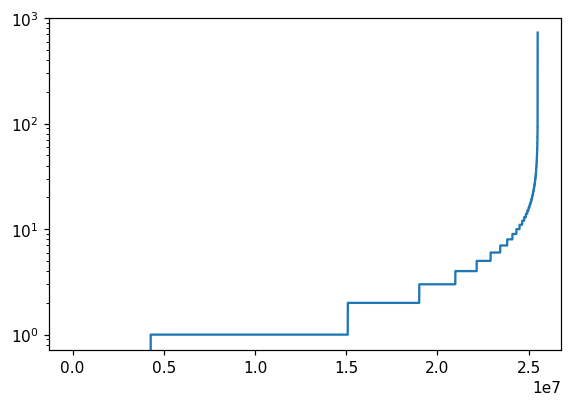

In [13]:
result = aggregate_result["tweet_feature_engagement_is_like"].sort_values()
print("LIKE")
print(result)
# Plotting the result
plt.clf()
plt.yscale('log')
plt.plot(result.values)
plt.show()

REPLY
mapped_feature_engager_id
3             0.0
23309348      0.0
23309347      0.0
23309346      0.0
23309345      0.0
            ...  
553276       68.0
498429       76.0
477306       86.0
1003485     107.0
538081      157.0
Name: tweet_feature_engagement_is_reply, Length: 25496088, dtype: float64


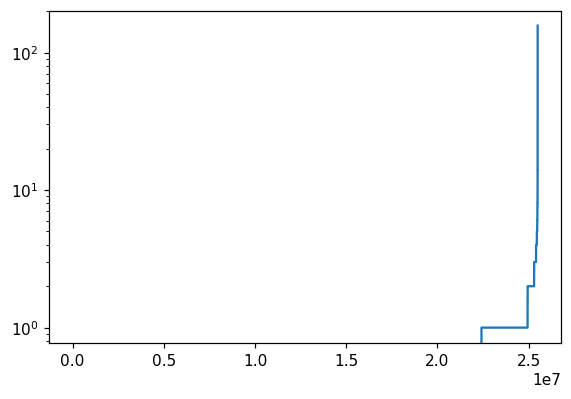

In [14]:
result = aggregate_result["tweet_feature_engagement_is_reply"].sort_values()
print("REPLY")
print(result)
# Plotting the result
plt.clf()
plt.yscale('log')
plt.plot(result.values)
plt.show()

COMMENT
mapped_feature_engager_id
3            0.0
23642277     0.0
23642276     0.0
23642275     0.0
23642274     0.0
            ... 
908824      50.0
50166       52.0
21166023    52.0
20413238    55.0
4850066     57.0
Name: tweet_feature_engagement_is_comment, Length: 25496088, dtype: float64


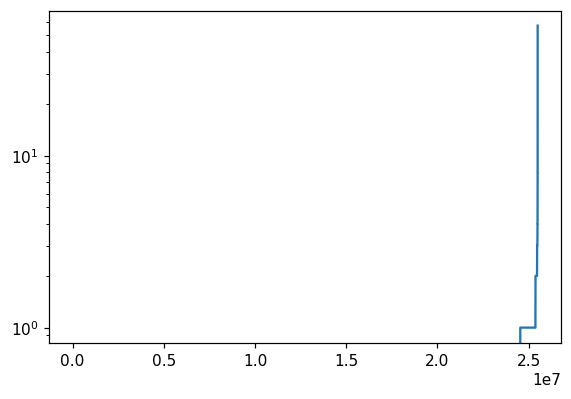

In [15]:
result = aggregate_result["tweet_feature_engagement_is_comment"].sort_values()
print("COMMENT")
print(result)
# Plotting the result
plt.clf()
plt.yscale('log')
plt.plot(result.values)
plt.show()

RETWEET
mapped_feature_engager_id
3             0.0
22964659      0.0
22964657      0.0
22964656      0.0
22964655      0.0
            ...  
26394       231.0
826579      235.0
620632      249.0
999856      254.0
80065       285.0
Name: tweet_feature_engagement_is_retweet, Length: 25496088, dtype: float64


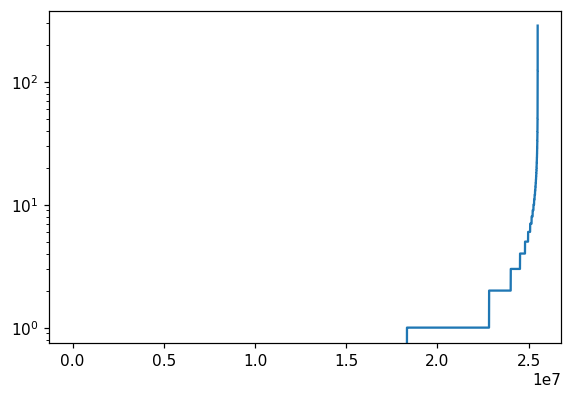

In [16]:
result = aggregate_result["tweet_feature_engagement_is_retweet"].sort_values()
print("RETWEET")
print(result)
# Plotting the result
plt.clf()
plt.yscale('log')
plt.plot(result.values)
plt.show()

POSITIVE
mapped_feature_engager_id
30341933      0
30747934      0
20083170      0
21942717      0
14229410      0
           ... 
7476488     554
22618905    615
64620       742
634593      746
2968901     762
Name: tweet_feature_engagement_is_positive, Length: 25496088, dtype: int64


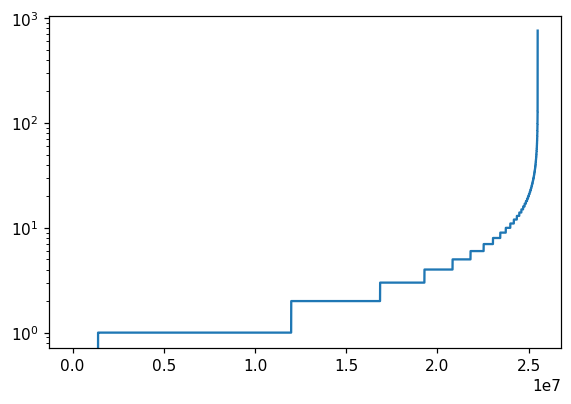

In [17]:
result = aggregate_result["tweet_feature_engagement_is_positive"].sort_values()
print("POSITIVE")
print(result)
# Plotting the result
plt.clf()
plt.yscale('log')
plt.plot(result.values)
plt.show()

NEGATIVE
mapped_feature_engager_id
32209275     0.0
30697541     0.0
7989218      0.0
30697545     0.0
12251188     0.0
            ... 
4144855     51.0
10755144    53.0
1338769     54.0
4067667     65.0
538081      73.0
Name: tweet_feature_engagement_is_negative, Length: 25496088, dtype: float64


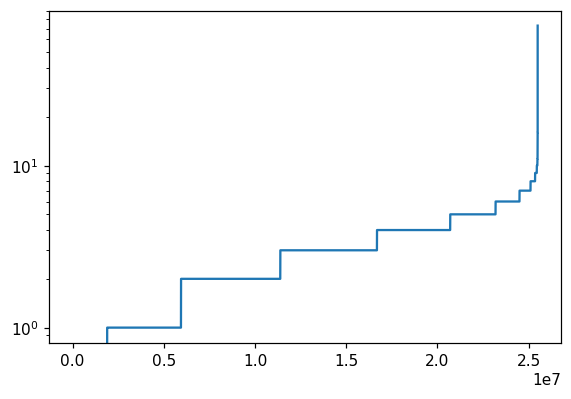

In [18]:
result = aggregate_result["tweet_feature_engagement_is_negative"].sort_values()
print("NEGATIVE")
print(result)
# Plotting the result
plt.clf()
plt.yscale('log')
plt.plot(result.values)
plt.show()

## Let's see the behaviour of the user that usually put likes

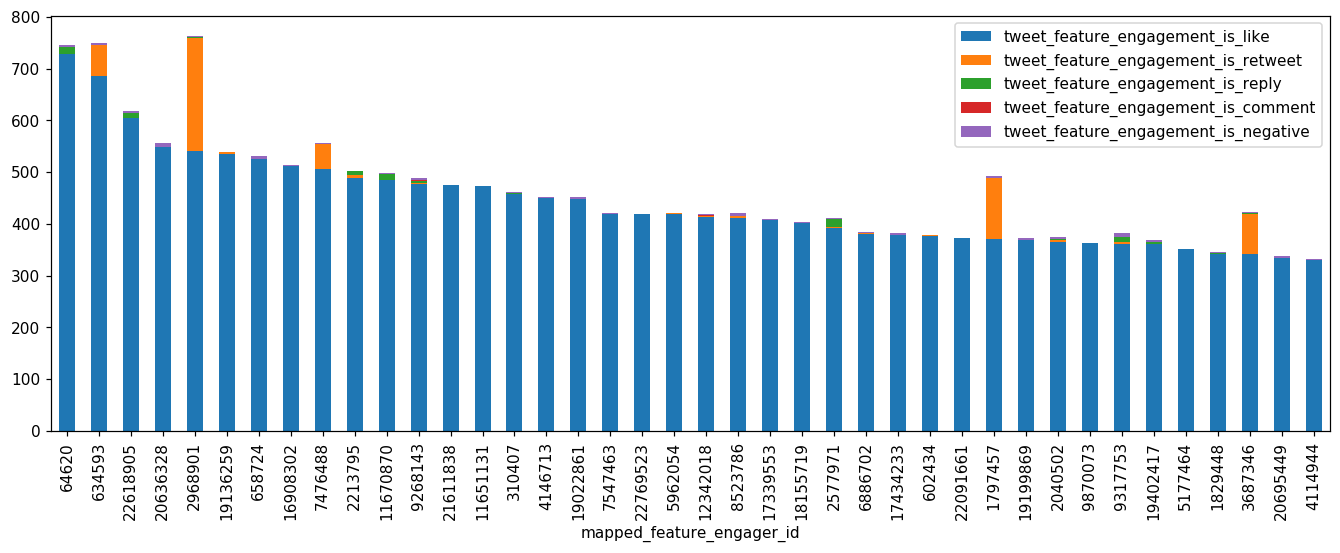

In [19]:
plt.rcParams['figure.figsize'] = [15, 5]
aggregate_result[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]].sort_values("tweet_feature_engagement_is_like", ascending=False)[:40].plot.bar(stacked=True)

## Let's the behaviour of the user that usually put reply

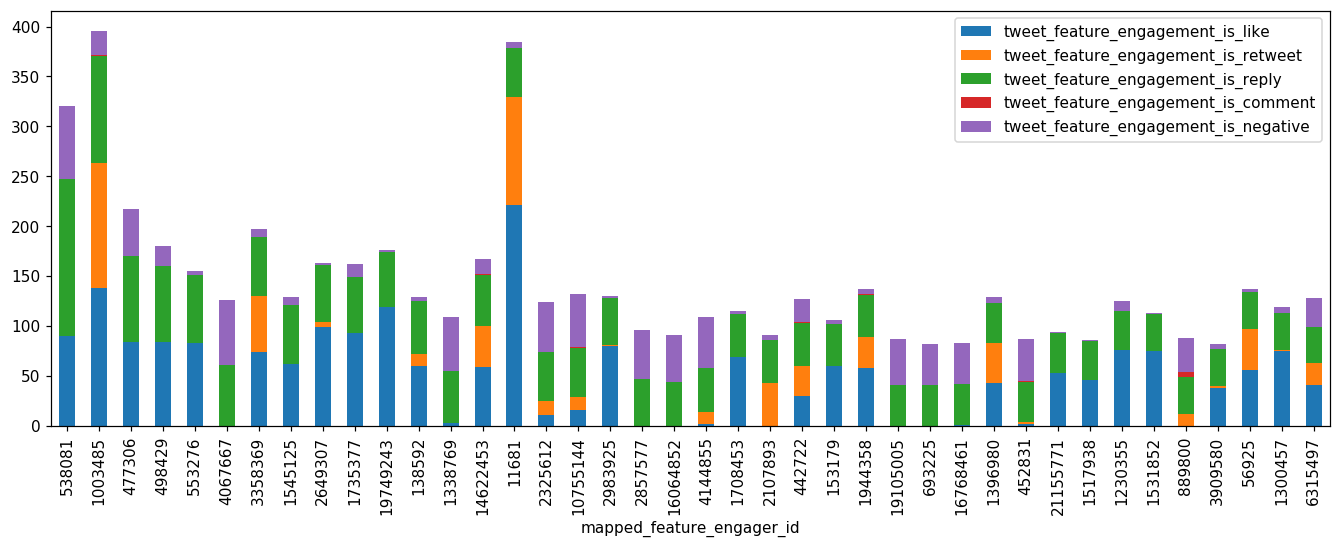

In [20]:
plt.rcParams['figure.figsize'] = [15, 5]
aggregate_result[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]].sort_values("tweet_feature_engagement_is_reply", ascending=False)[:40].plot.bar(stacked=True)

## Let's the behaviour of the user that usually put retweet

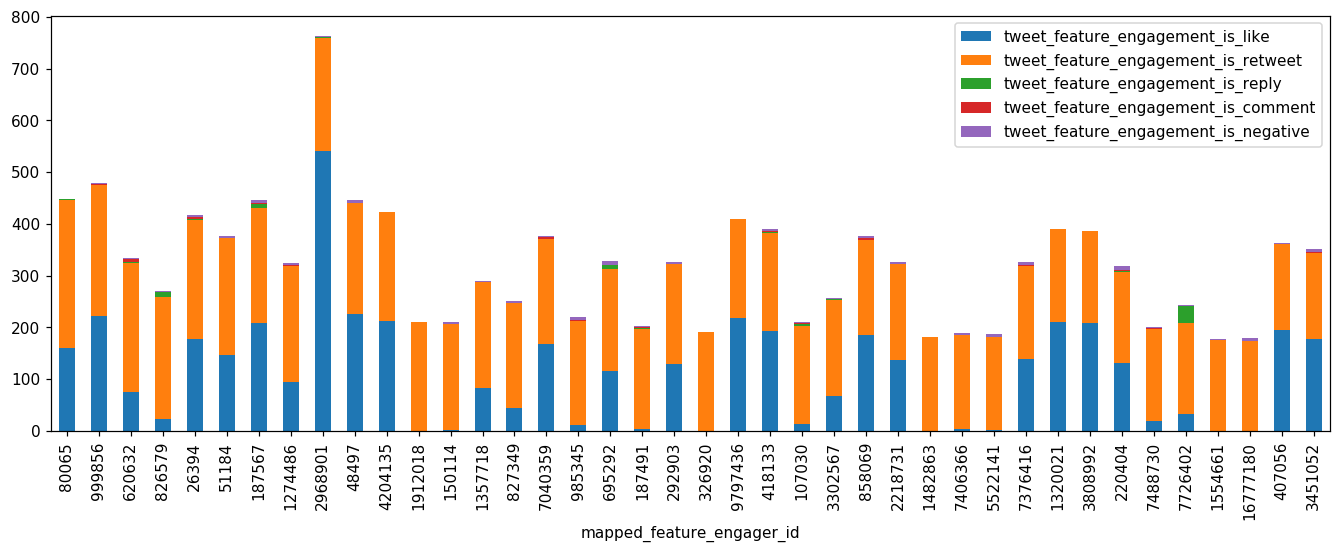

In [21]:
plt.rcParams['figure.figsize'] = [15, 5]
aggregate_result[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]].sort_values("tweet_feature_engagement_is_retweet", ascending=False)[:40].plot.bar(stacked=True)

## Let's the behaviour of the user that usually put retweet with comment

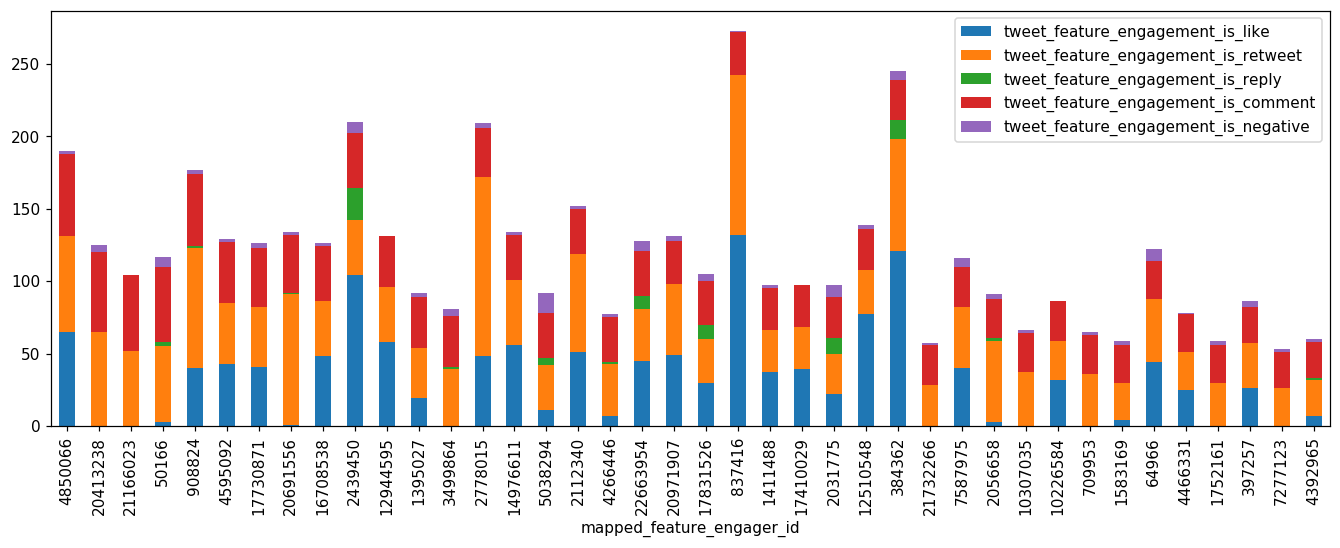

In [22]:
plt.rcParams['figure.figsize'] = [15, 5]
aggregate_result[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]].sort_values("tweet_feature_engagement_is_comment", ascending=False)[:40].plot.bar(stacked=True)

## Let's the behaviour of the user that usually has positive engagement

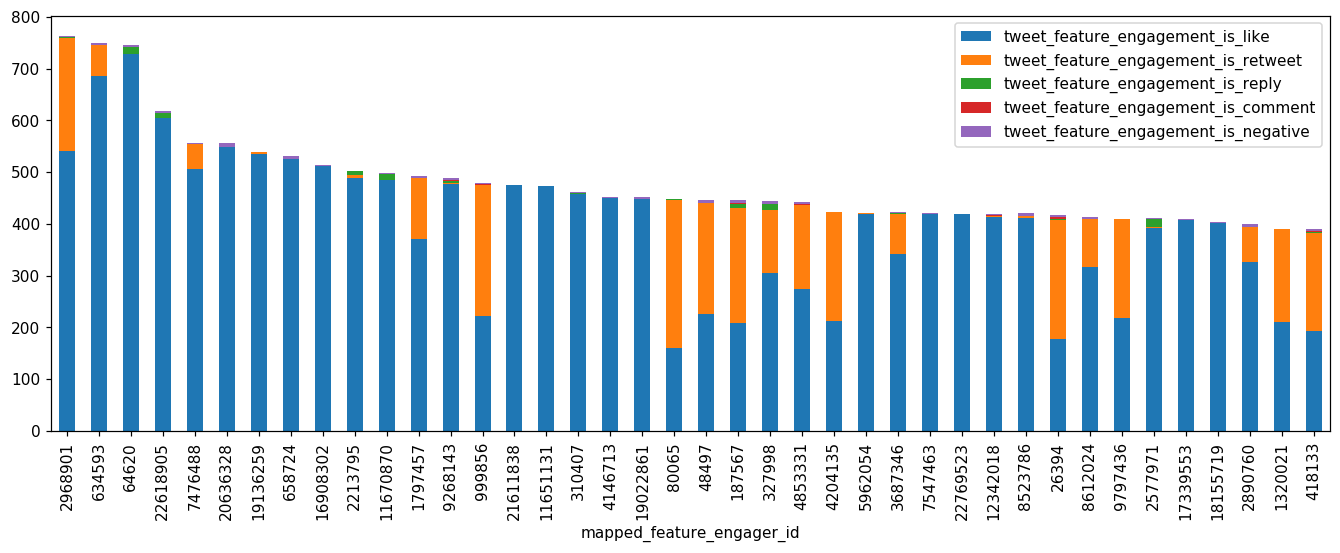

In [23]:
plt.rcParams['figure.figsize'] = [15, 5]
aggregate_result.sort_values("tweet_feature_engagement_is_positive", ascending=False)[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]][:40].plot.bar(stacked=True)

## Let's the behaviour of the user that usually has negative engagement

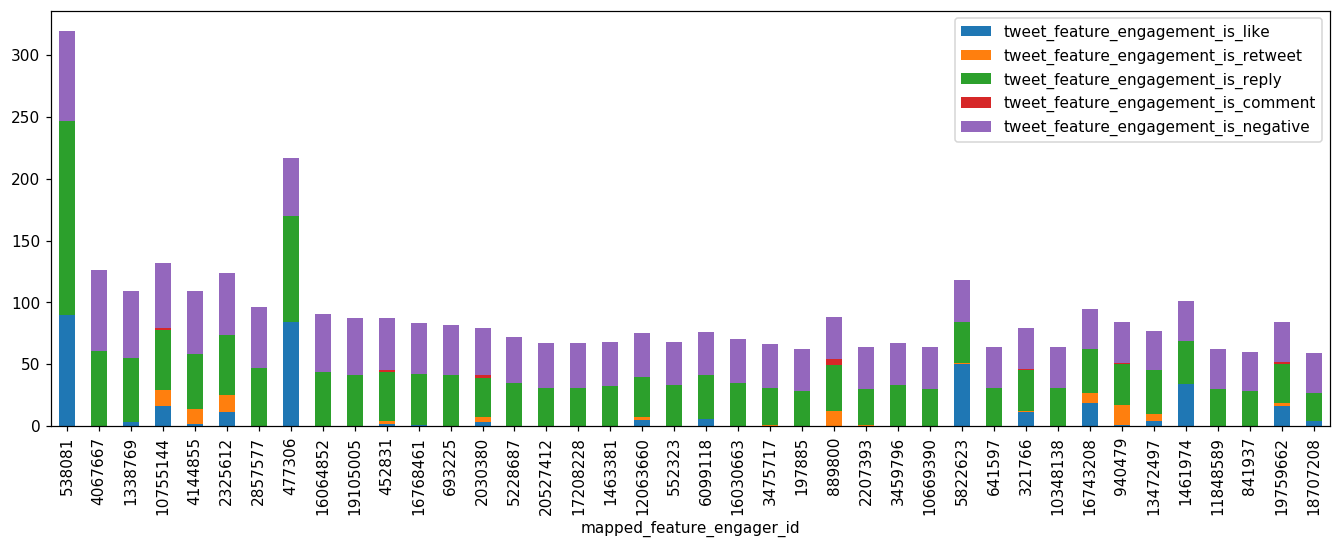

In [24]:
plt.rcParams['figure.figsize'] = [15, 5]
aggregate_result[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]].sort_values("tweet_feature_engagement_is_negative", ascending=False)[:40].plot.bar(stacked=True)

## Let's change topic and see how many tweets a user has created (user that are no creators are ignored)

In [25]:
dataframe

,mapped_feature_tweet_id,mapped_feature_creator_id,mapped_feature_engager_id,tweet_feature_engagement_is_like,tweet_feature_engagement_is_retweet,tweet_feature_engagement_is_reply,tweet_feature_engagement_is_comment,tweet_feature_engagement_is_negative,tweet_feature_engagement_is_positive
0,0,0,594154,False,False,False,False,True,0
1,1,1,15871987,False,False,False,False,True,0
2,2,2,15871988,True,False,False,False,False,1
3,3,3,15871988,False,False,False,False,True,0
4,4,2,15871988,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...
148075233,73549796,1906164,13759885,False,False,False,False,True,0
148075234,73549797,4636477,13759885,False,False,False,False,True,0
148075235,2581571,921,13759885,True,True,False,False,False,2
148075236,15200993,2023663,8679012,True,False,False,False,False,1


In [26]:
sorted_result = dataframe.drop_duplicates(["mapped_feature_creator_id", "mapped_feature_tweet_id"]).groupby("mapped_feature_creator_id").size().sort_values()

In [27]:
print(sorted_result[-20:])

mapped_feature_creator_id
730      1745
22577    1791
2467     1840
34439    1855
37921    1868
47603    1877
19892    1881
25912    1890
15860    1930
11575    1976
8839     2026
4501     2067
10630    2076
17555    2110
17828    2241
10403    2281
775      2293
860      2400
15696    3014
169      3172
dtype: int64


#### On Y we have the count of tweets created, on X we have users sorted by the count

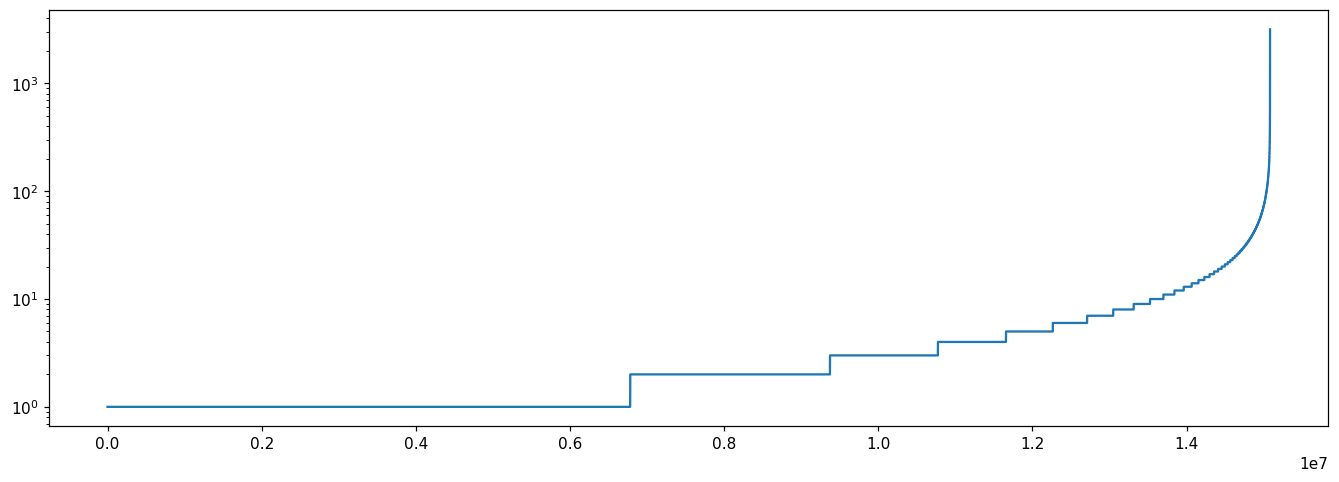

In [28]:
plt.yscale('log')
plt.plot(range(len(sorted_result)), sorted_result.values)
plt.show()

## Let's see which is the creator that have RECEIVED the most engagements

In [29]:
aggregate_result = dataframe.drop_duplicates(["mapped_feature_creator_id", "mapped_feature_tweet_id"]).drop(columns=["mapped_feature_tweet_id", "mapped_feature_engager_id"]).groupby("mapped_feature_creator_id").sum()

#### Users that received more likes

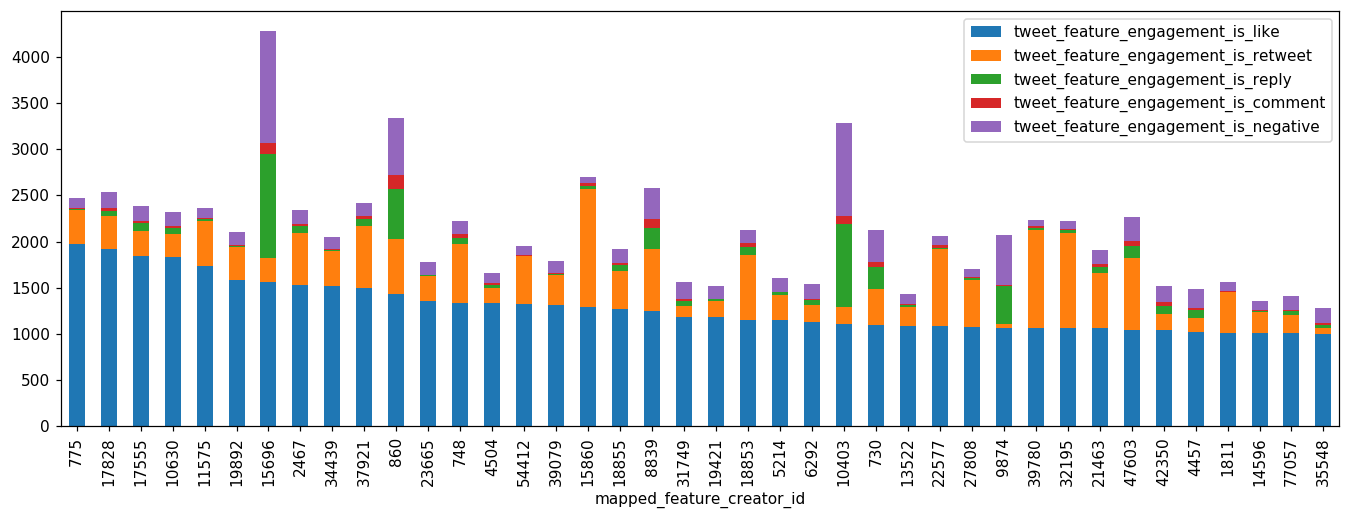

In [30]:
plt.rcParams['figure.figsize'] = [15, 5]
aggregate_result[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]].sort_values("tweet_feature_engagement_is_like", ascending=False)[:40].plot.bar(stacked=True)

#### Users that received more replies

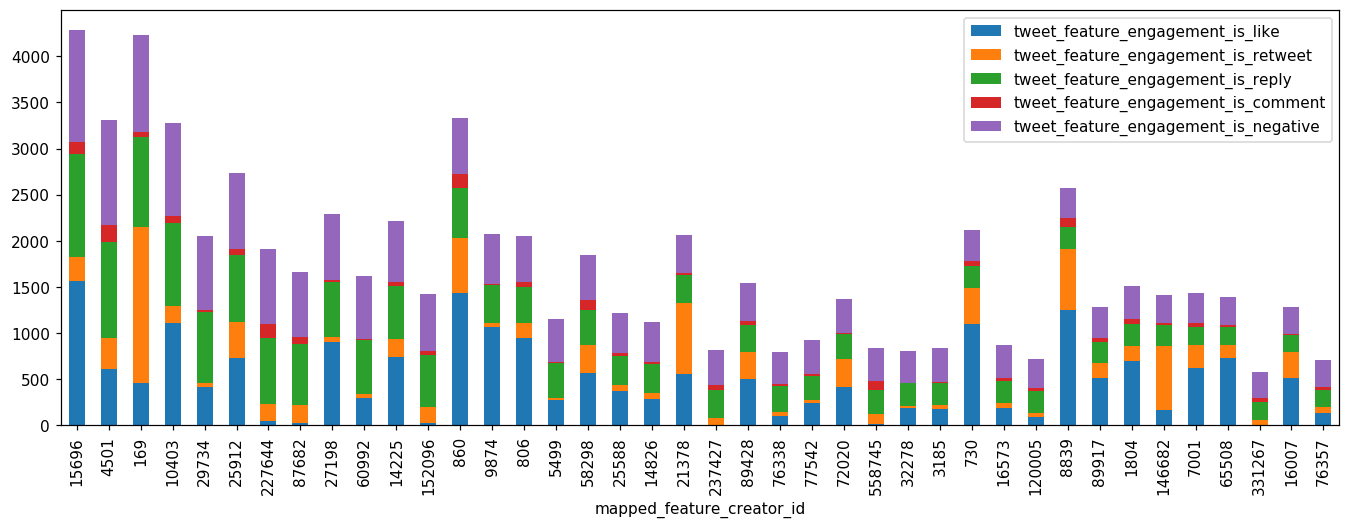

In [31]:
plt.rcParams['figure.figsize'] = [15, 5]
aggregate_result[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]].sort_values("tweet_feature_engagement_is_reply", ascending=False)[:40].plot.bar(stacked=True)

#### Users that received more retweets

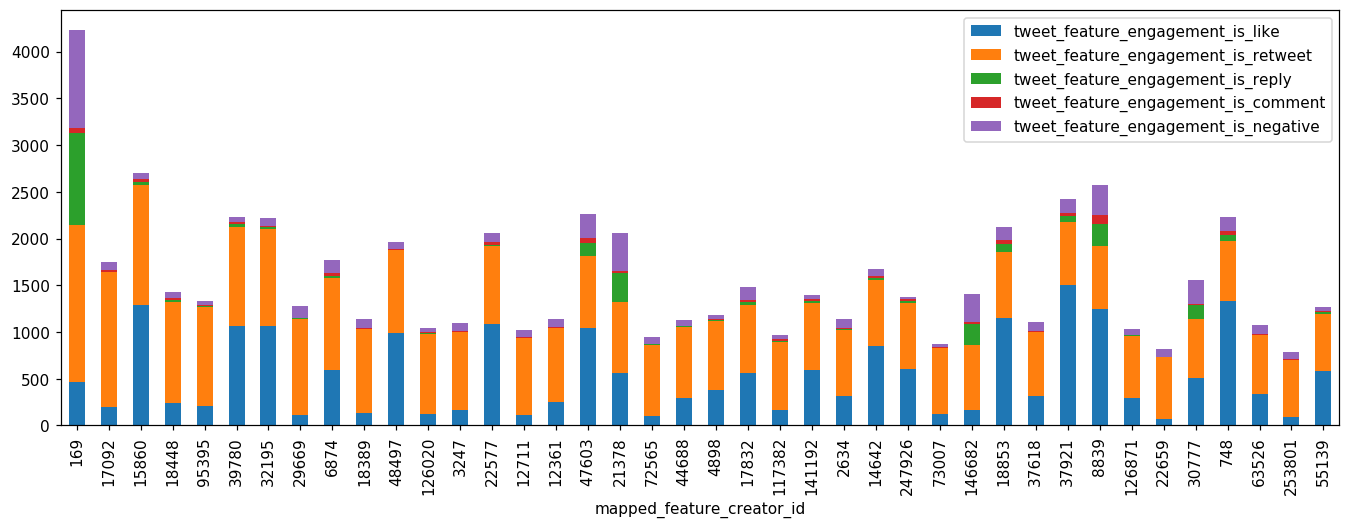

In [32]:
plt.rcParams['figure.figsize'] = [15, 5]
aggregate_result[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]].sort_values("tweet_feature_engagement_is_retweet", ascending=False)[:40].plot.bar(stacked=True)

#### Users that received more comments

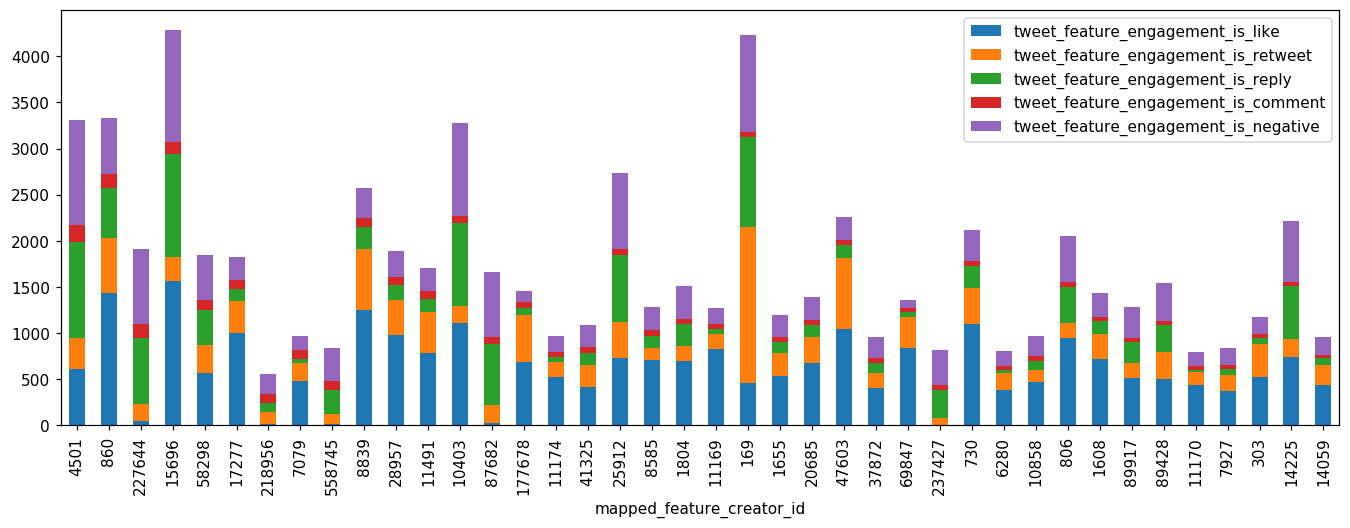

In [33]:
plt.rcParams['figure.figsize'] = [15, 5]
aggregate_result[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]].sort_values("tweet_feature_engagement_is_comment", ascending=False)[:40].plot.bar(stacked=True)

#### Users that received more negative engagements

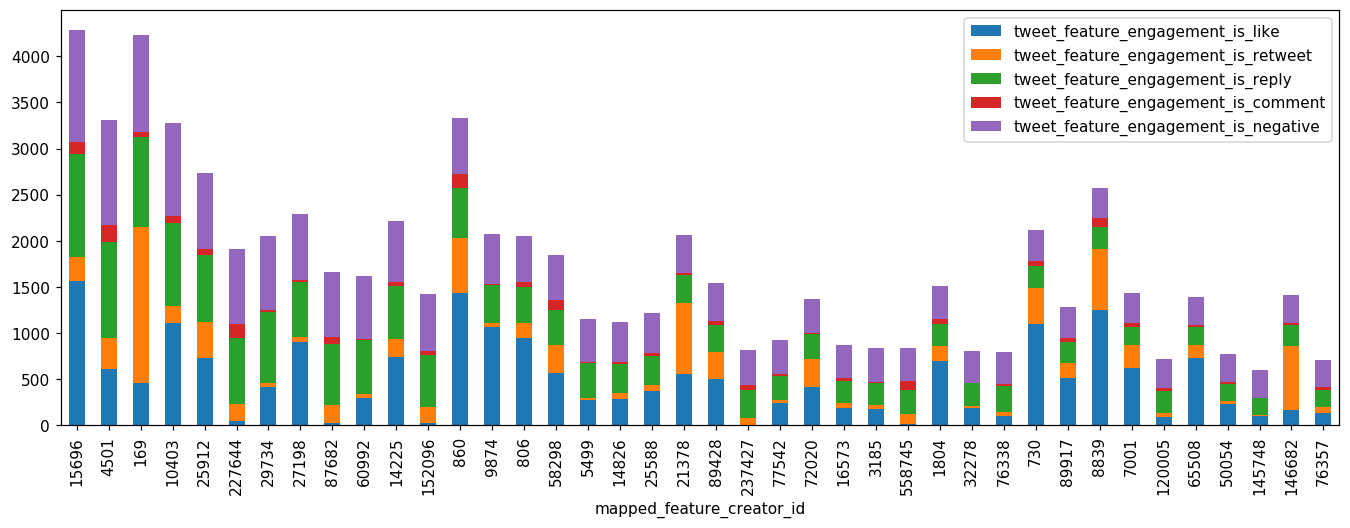

In [34]:
plt.rcParams['figure.figsize'] = [15, 5]
aggregate_result[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]].sort_values("tweet_feature_engagement_is_negative", ascending=False)[:40].plot.bar(stacked=True)

#### Users that received more positive engagements

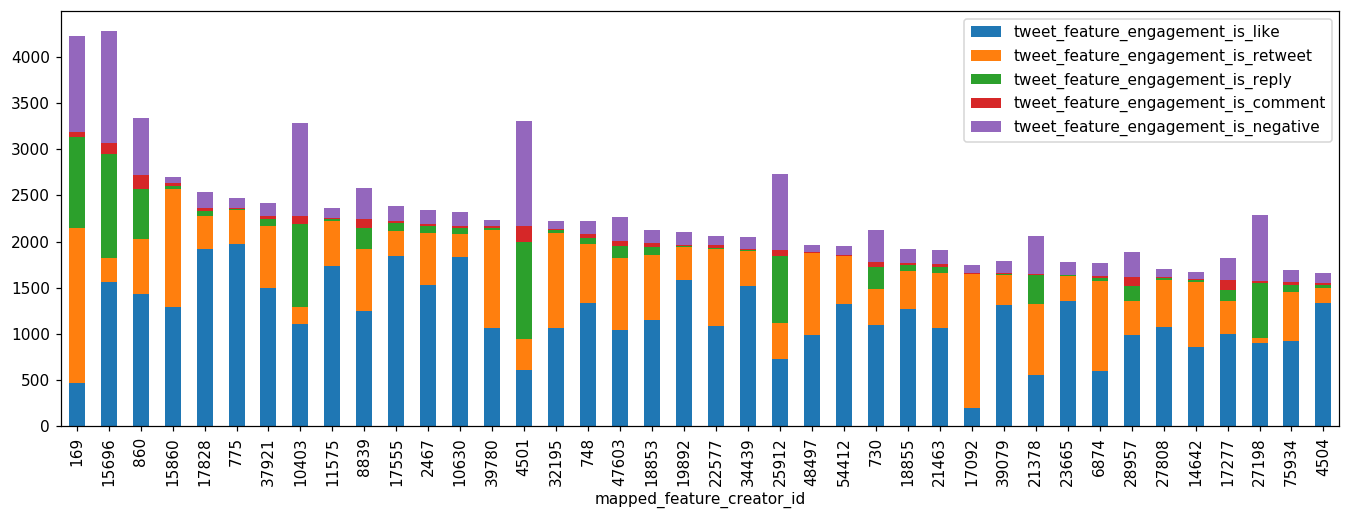

In [35]:
plt.rcParams['figure.figsize'] = [15, 5]
aggregate_result.sort_values("tweet_feature_engagement_is_positive", ascending=False)[:40][[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]].plot.bar(stacked=True)

In [36]:
aggregate_result.sort_values("tweet_feature_engagement_is_positive", ascending=False)[:40]

,tweet_feature_engagement_is_like,tweet_feature_engagement_is_retweet,tweet_feature_engagement_is_reply,tweet_feature_engagement_is_comment,tweet_feature_engagement_is_negative,tweet_feature_engagement_is_positive
mapped_feature_creator_id,,,,,,
169,464.0,1686.0,978.0,54.0,1049.0,3182
15696,1567.0,258.0,1120.0,123.0,1216.0,3068
860,1433.0,594.0,546.0,151.0,612.0,2724
15860,1291.0,1280.0,32.0,29.0,68.0,2632
17828,1919.0,354.0,55.0,38.0,172.0,2366
775,1975.0,370.0,12.0,3.0,115.0,2360
37921,1502.0,672.0,67.0,37.0,142.0,2278
10403,1112.0,185.0,899.0,77.0,1007.0,2273
11575,1740.0,488.0,20.0,12.0,101.0,2260
